Import numpy and pandas.

In [32]:
import pandas as pd
import numpy as np
import matplotlib

Using the bash magic command, view the list of files inside of the data directory.

In [33]:
%%bash 
ls data

ActiveFile-Wilm1thru8-20191015.csv
DE-VoterFile-Documentation 20171010.pdf


Load the csv file into a Pandas DataFrame.

In [34]:
voters_df = pd.read_csv("./data/ActiveFile-Wilm1thru8-20191015.csv")

/Users/jkocher/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,32,35,36,37,40,41,42,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Display a list of columns in the DataFrame.

In [35]:
 voters_df.columns

Index(['UNIQUE-ID', 'LAST-NAME', 'FIRST-NAME', 'MID-INIT', 'SUFFIX',
       'YEAR-OF-BIRTH', 'HOME-NO', 'HOME-APT', 'HOME-STREET', 'HOME-DEV',
       'HOME-CITY', 'HOME-ZIPCODE', 'COUNTY', 'ED', 'RD', 'SD', 'CNLEVY',
       'WILM', 'CODE-HOME-CITY', 'SCH-DIST', 'PARTY', 'DATE-REG', 'PP-HIST-1',
       'PP-HIST-2', 'PR-HIST-1', 'PR-HIST-2', 'PR-HIST-3', 'GEN-HIST-1',
       'GEN-HIST-2', 'GEN-HIST-3', 'GEN-HIST-4', 'GEN-HIST-5', 'SP-HIST-1',
       'SP-HIST-2', 'SP-HIST-3', 'SCHL-HIST-1', 'SCHL-HIST-2', 'SCHL-HIST-3',
       'SCHL-HIST-4', 'SCHL-HIST-5', 'REF-HIST-1', 'REF-HIST-2', 'REF-HIST-3',
       'REF-HIST-4', 'REF-HIST-5', 'MAIL-NO', 'MAIL-APT', 'MAIL-STR',
       'MAIL-CITY', 'MAIL-STATE', 'MAIL-ZIP', 'DATE-LAST-CHG', 'CODE-CHANGE',
       'STATUS'],
      dtype='object')

What is the shape of this DataFrame? How many columns does each row have? How many rows are there?

In [36]:
voters_df.shape

(51909, 54)

# HOME ZIP CODE

Group objects using the HOME-ZIPCODE column. Assign the value to a variable called grouped_zc.  
[Pandas Groupby User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [37]:
grouped_zc=voters_df.groupby("HOME-ZIPCODE")

What type of object is grouped_zc?

In [38]:
type(grouped_zc)

pandas.core.groupby.generic.DataFrameGroupBy

DataFrameGroupBy objects contain a groups attribute. Display the value of the groups attribute belonging to the grouped_zc object.

In [39]:
grouped_zc

Invoke the size method on the grouped_zc object to find out how many items are associated with each zip code.

In [40]:
grouped_zc.size()

HOME-ZIPCODE
19801    10730
19802    17182
19805    15548
19806     8326
19807      123
dtype: int64

Use a magic command so that matplotlib graphics will display inline.

In [41]:
%matplotlib inline

Create a pie chart illustrating the number of voters per zip code.

([<matplotlib.patches.Wedge at 0x11a997250>,
 [Text(0.8760967626973386, 0.6651725057391077, '19801'),
  Text(-0.764058752148303, 0.7913369846440758, '19802'),
  Text(-0.42112865275664896, -1.0161942028113375, '19805'),
  Text(0.9552631610472119, -0.5454102063090577, '19806'),
  Text(1.099969521734947, -0.008188483021424421, '19807')])

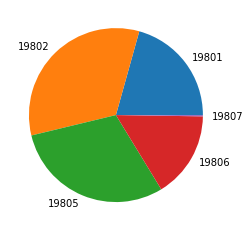

In [42]:
labels = "19801", "19802", "19805", "19806", "19807"
matplotlib.pyplot.pie(grouped_zc.size(), labels = labels)

# YEAR OF BIRTH

Group objects by the YEAR-OF-BIRTH column. Assign the value to an object called "grouped_yob".

In [43]:
grouped_yob=voters_df.groupby("YEAR-OF-BIRTH")

Display the value of the groups attribute belonging the grouped_yob object.

In [44]:
grouped_yob.size()

YEAR-OF-BIRTH
1900      1
1912      1
1915      2
1916      3
1917      2
       ... 
1998    786
1999    719
2000    717
2001    575
2002    395
Length: 90, dtype: int64

Select the object for the row indicating that the voter was born in 1900.

In [45]:
voters_df.loc[lambda voters_df: voters_df["YEAR-OF-BIRTH"] < 1901, :]

,UNIQUE-ID,LAST-NAME,FIRST-NAME,MID-INIT,SUFFIX,YEAR-OF-BIRTH,HOME-NO,HOME-APT,HOME-STREET,HOME-DEV,...,REF-HIST-5,MAIL-NO,MAIL-APT,MAIL-STR,MAIL-CITY,MAIL-STATE,MAIL-ZIP,DATE-LAST-CHG,CODE-CHANGE,STATUS
49249,101092654,KENNEDY,JORDAN,D,NaN,1900,724,NaN,N BANCROFT PKY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170731,P6,I


Graph a histogram to  illustrate the age distribution of voters in this dataset. Ty using different values for the bins attribute of the histogram. 

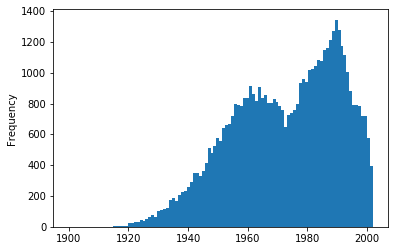

In [46]:
voters_df["YEAR-OF-BIRTH"].plot.hist(bins=103)

# PARTY

Group objects using the PARTY column. Assign the value to a variable called grouped_p.

In [47]:
grouped_p = voters_df.groupby("PARTY")

Display the value of the groups attribute belonging to the grouped_p object.

In [48]:
grouped_p

Invoke the size method on the grouped_p object to find out how many items are associated with each party.

In [49]:
# 
grouped_P=grouped_p.size()
grouped_P

PARTY
A       52
B      441
D    38020
E       30
G       42
H       82
I     7670
J      161
L       98
M        1
O       33
Q       17
R     4851
T       14
V       11
W      333
Y       14
Z       39
dtype: int64

Create a bar chart to visualize the number of voters associated with each party.

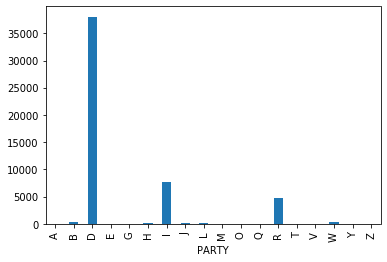

In [50]:
grouped_P.plot.bar()

# Merging Two DataFrames

Using the data from the documentation, create a Pandas DataFrame that contains the party code and the corresponding legal name for each party.

In [51]:
legal_names = {"A": "AMERICAN",
              "B": "AMERICAN DELTA",
              "D": "DEMOCRATIC PARTY",
              "E": "LIBERAL",
              "G": "NON PARTISAN",
              "H": "GREEN PARTY",
              "I": "UNAFFILIATED",
              "J": "WORKING FAMILIES PARTY",
              "L": "LIBERTARIAN PARTY",
              "M": "REFORM PARTY",
              "O": "OTHERS/ALL OTHER PARTIES",
              "Q": "CONSTITUTION PARTY",
              "R": "REPUPLICAN PARTY",
              "T": "CONSERVATIVE",
              "V": "NATURAL LAW PARTY",
              "W": "INDEPENDENT PARTY OF DEL",
              "Y": "THE BLUE ENIGMA PARTY",
              "Z": "SOCIALIST WORKERS PARTY",}

In [102]:
df_legal_names=pd.DataFrame(legal_names.items())
df_legal_names=df_legal_names.rename(columns={0:"PARTY", 
                      1:"party name"})
df_legal_names=df_legal_names.set_index("PARTY")

In [103]:
df_legal_names

,party name
PARTY,
A,AMERICAN
B,AMERICAN DELTA
D,DEMOCRATIC PARTY
E,LIBERAL
G,NON PARTISAN
H,GREEN PARTY
I,UNAFFILIATED
J,WORKING FAMILIES PARTY
L,LIBERTARIAN PARTY


Create a Pandas DataFrame that contains the Party code and the corresponding number of registered voters for said party.

In [104]:
df_party_counts = pd.DataFrame(grouped_P)
df_party_counts = df_party_counts.rename(columns={"PARTY":"PARTY",
                               0: "COUNT"})

In [105]:
df_party_counts 

,COUNT
PARTY,
A,52
B,441
D,38020
E,30
G,42
H,82
I,7670
J,161
L,98


Merge the two DataFrames.

In [106]:
merge_df = pd.merge(df_party_counts, df_legal_names, how = "left", on=["PARTY","PARTY"])

In [110]:
merge_df

,,COUNT,party name
PARTY,PARTY,,
A,A,52,AMERICAN
B,B,441,AMERICAN DELTA
D,D,38020,DEMOCRATIC PARTY
E,E,30,LIBERAL
G,G,42,NON PARTISAN
H,H,82,GREEN PARTY
I,I,7670,UNAFFILIATED
J,J,161,WORKING FAMILIES PARTY
L,L,98,LIBERTARIAN PARTY


Create a bar graph again but using the legal name for each party as the value on the x axes.

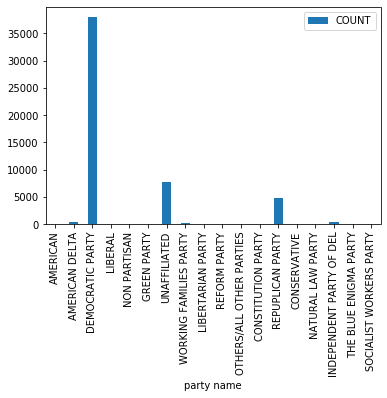

In [114]:
merge_df.plot.bar(x = "party name", y = "COUNT")